# Brain Tumor CLassification: Exploratory Data Analysis (EDA)

### 1. Dataset Overview
This project combines multiple (3) public brain tumor MRI image datasets to build a 3-class classifier for:
- **meningioma**  
- **glioma**  
- **pituitary tumor**

### Class Definitions
| Class          | Description |
|----------------|-------------|
| **Meningioma** | Benign tumors arising from the meninges (outer layers of the brain). |
| **Glioma**     | Tumors originating from glial cells; includes astrocytomas, oligodendrogliomas, and glioblastomas. |
| **Pituitary**  | Usually benign tumors that develop in the pituitary gland at the base of the brain. |


### 2. Class Distributions
Before training, it's essential to understand how many samples exist per class. Imbalanced data can bias the model toward overpredicting majority classes.

We’ll examine the sample counts across all datasets and visualize the overall distribution.


{'Glioma': 4804, 'Menin': 4805, 'Pituitary': 4823}


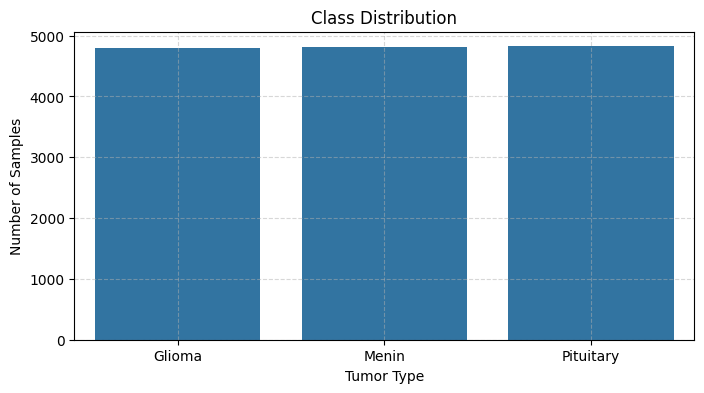

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image

# define path
data_dir = r"C:\Users\SCHOOL\OneDrive - UBC\Documents\brain-tumor-classifier\data\raw"

# count samples
def count_samples(directory):
    return {cls: len(os.listdir(os.path.join(directory, cls))) for cls in os.listdir(directory)}

counts = count_samples(data_dir)
print(counts)

# plot class distribution
plt.figure(figsize=(8, 4))
sns.barplot(x=list(counts.keys()), y=list(counts.values()))
plt.title("Class Distribution")
plt.ylabel("Number of Samples")
plt.xlabel("Tumor Type")
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("../reports/class_distribution.png", bbox_inches="tight")
plt.show()

From what we can see above:
- Each class has roughly 4,800 samples
- Class balance is excellent; all classes have nearly identical sample numbers
- No need for oversampling or class weighting, as difference in class distribution are negligible and won't bias the model during training



### 3. Image Quality

To ensure our model learns meaningul patterns from the input images, we need to make sample visualizations

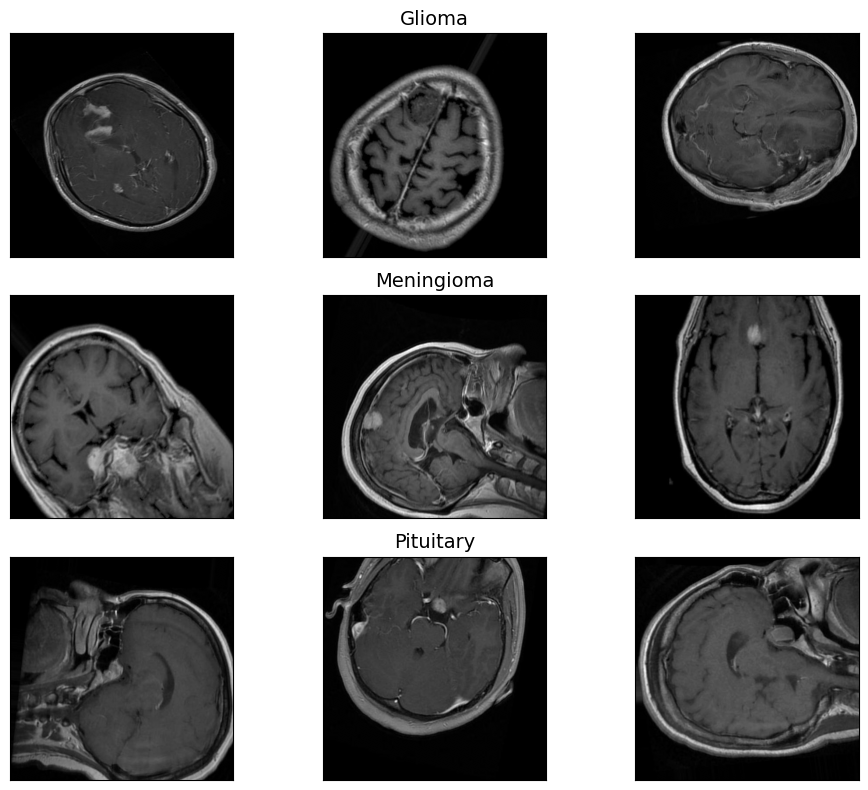

In [ ]:
# seed for reproducibility
np.random.seed(55)

# load N random images from a class folder
def load_n_images(class_name, n=3):
    class_path = os.path.join(data_dir, class_name)
    files = np.array(os.listdir(class_path))
    selected_files = np.random.choice(files, size=n, replace=False)
    return [Image.open(os.path.join(class_path, f)).convert("L") for f in selected_files]  # Load as grayscale

# load 3 images per class
glioma_imgs = load_n_images("Glioma", n=3)
menin_imgs = load_n_images("Menin", n=3)
pituitary_imgs = load_n_images("Pituitary", n=3)

# plot all images
fig, axes = plt.subplots(3, 3, figsize=(10, 8))

# Glioma row
for i, img in enumerate(glioma_imgs):
    axes[0, i].imshow(img, cmap="gray")
    if i == 1:
        axes[0, i].set_title("Glioma", fontsize=14)

# Meningioma row
for i, img in enumerate(menin_imgs):
    axes[1, i].imshow(img, cmap="gray")
    if i == 1:
        axes[1, i].set_title("Meningioma", fontsize=14)

# Pituitary row
for i, img in enumerate(pituitary_imgs):
    axes[2, i].imshow(img, cmap="gray")
    if i == 1:
        axes[2, i].set_title("Pituitary", fontsize=14)

# remove ticks
for ax in axes.flat:
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.savefig("../reports/image_quality_comparison.png", bbox_inches="tight")
plt.show()

Looking at the plotted images:
- All images appear to have similar contrast and to be of uniform size
- Differences in tumor location and scanning angle will help the model in learning diverse features

### 4. Final Notes
- Each class has approximately 4,800 samples (Glioma: 4,804 | Meningioma: 4,805 | Pituitary: 4,823)
- No need for oversampling or class weighting
- All images are visually consistent in resolution, contrast, and brightness
- Subtle differences in tumor location, shape, and texture suggest the model will learn diverse features
